<a href="https://colab.research.google.com/github/abdulrasid2004/Improved-Source-of-Drinking-Water/blob/main/Improved_Source_of_Drinking_Water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Step 1: Load dataset

CSV_PATH = "/content/file-1741200485414-441357401.csv"  # Upload your CSV file in Colab
df = pd.read_csv(CSV_PATH)

print("Columns available:", df.columns.tolist())
df.head()

Columns available: ['State', 'State_UT_Code', 'Financial  Year', 'Opening Balance ', 'Funds Allocated by Government of India', 'Funds Released by Government of India', "Total Funds Available (Government of India's Share)", "Expenditure out of Government of India's Share", "Expenditure out of State Governments' Share ", 'Bank Interest Accrued ', 'Other Deposits / Recoveries', 'Total Expenditure (Government of India and State Share) ', " Extent of Funds Utilised against Total Funds Available (Government of India's Share)"]


,State,State_UT_Code,Financial Year,Opening Balance,Funds Allocated by Government of India,Funds Released by Government of India,Total Funds Available (Government of India's Share),Expenditure out of Government of India's Share,Expenditure out of State Governments' Share,Bank Interest Accrued,Other Deposits / Recoveries,Total Expenditure (Government of India and State Share),Extent of Funds Utilised against Total Funds Available (Government of India's Share)
0,Andhra Pradesh,1,2015-16,33.44,156.69,170.05,203.49,190.60,224.00,0.00,0.0,414.60,93.67
1,Arunachal Pradesh,2,2015-16,16.09,58.08,65.40,81.49,66.23,5.56,0.00,0.0,71.79,81.27
2,Assam,3,2015-16,92.10,268.26,277.58,369.68,216.19,59.63,0.28,0.0,275.82,58.48
3,Bihar,4,2015-16,276.54,229.60,202.73,479.27,295.38,144.55,0.00,0.0,439.93,61.63
4,Chhattisgarh,5,2015-16,12.05,63.69,60.83,72.88,64.64,67.20,0.00,0.0,131.84,88.69


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 13 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   State                                                                                  296 non-null    object 
 1   State_UT_Code                                                                          296 non-null    int64  
 2   Financial  Year                                                                        296 non-null    object 
 3   Opening Balance                                                                        258 non-null    float64
 4   Funds Allocated by Government of India                                                 258 non-null    float64
 5   Funds Released by Government of India                                         

In [ ]:
df.describe()

,State_UT_Code,Opening Balance,Funds Allocated by Government of India,Funds Released by Government of India,Total Funds Available (Government of India's Share),Expenditure out of Government of India's Share,Expenditure out of State Governments' Share,Bank Interest Accrued,Other Deposits / Recoveries,Total Expenditure (Government of India and State Share),Extent of Funds Utilised against Total Funds Available (Government of India's Share)
count,296.00000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,19.00000,162.090233,971.315078,535.419690,697.509922,455.635039,368.148876,1.012791,-0.117209,823.783915,65.191008
std,10.69516,333.069836,1968.795222,1051.386922,1319.747894,901.508734,867.638025,4.857560,1.737349,1726.330625,28.000083
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-27.660000,0.000000,0.000000
25%,10.00000,6.352500,63.600000,50.312500,75.960000,49.917500,13.497500,0.000000,0.000000,76.907500,51.857500
50%,19.00000,35.305000,230.610000,185.475000,248.010000,173.765000,85.515000,0.000000,0.000000,299.490000,70.065000
75%,28.00000,158.160000,805.480000,482.520000,683.147500,467.607500,355.630000,0.000000,0.000000,835.260000,87.827500
max,37.00000,2971.740000,13328.600000,9496.540000,12468.280000,9990.160000,9444.810000,59.880000,1.950000,19434.970000,103.440000


/tmp/ipython-input-450595796.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_allocated.values, y=top_allocated.index, palette="viridis")


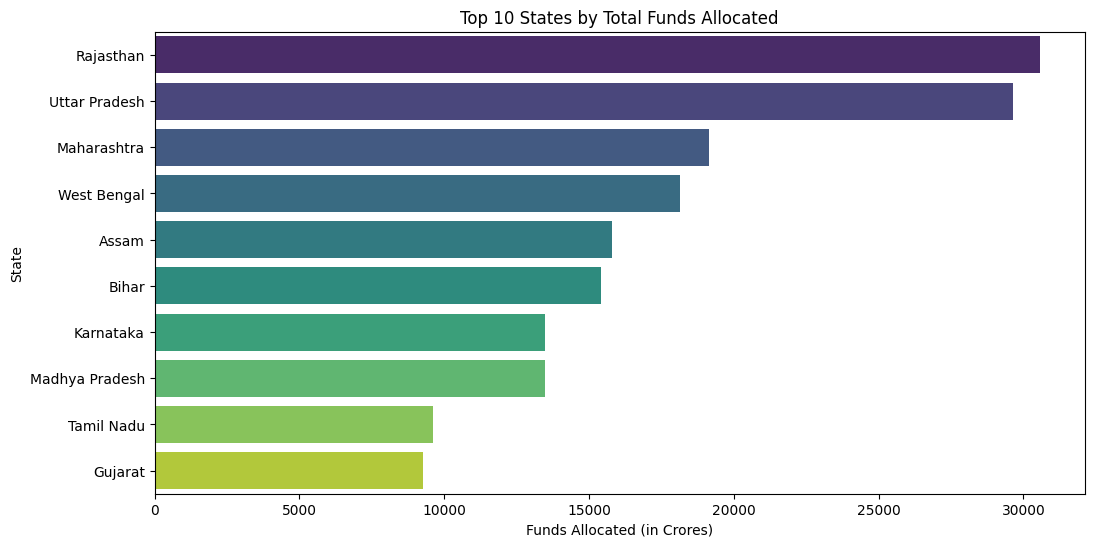

In [ ]:
# ------------------------------------------------
# 1. Bar Chart – Top 10 States by Funds Allocated
# ------------------------------------------------
top_allocated = df.groupby("State")["Funds Allocated by Government of India"].sum().nlargest(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_allocated.values, y=top_allocated.index, palette="viridis")
plt.title("Top 10 States by Total Funds Allocated")
plt.xlabel("Funds Allocated (in Crores)")
plt.ylabel("State")
plt.show()

<Figure size 1200x600 with 0 Axes>

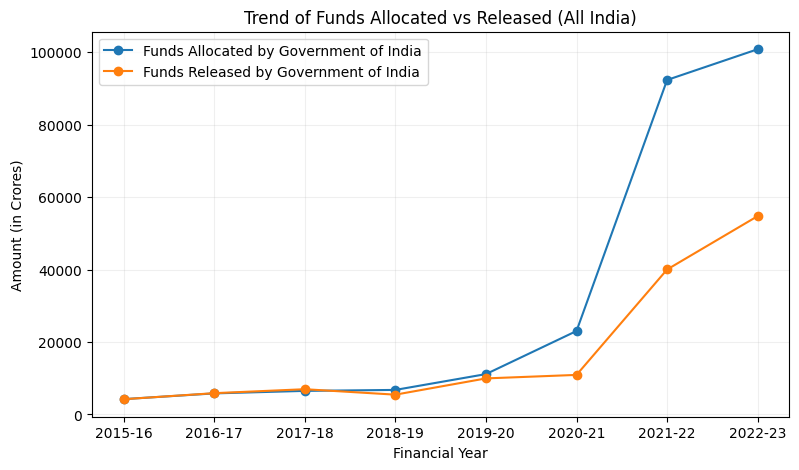

In [ ]:
# ------------------------------------------------
# 2. Line Chart – Trend of Funds Allocated vs Released (National Level)
# ------------------------------------------------
yearly_trend = df.groupby("Financial  Year")[["Funds Allocated by Government of India",
                                              "Funds Released by Government of India"]].sum()
plt.figure(figsize=(12,6))
yearly_trend.plot(marker="o")
plt.title("Trend of Funds Allocated vs Released (All India)")
plt.xlabel("Financial Year")
plt.ylabel("Amount (in Crores)")
plt.grid(True)
plt.show()


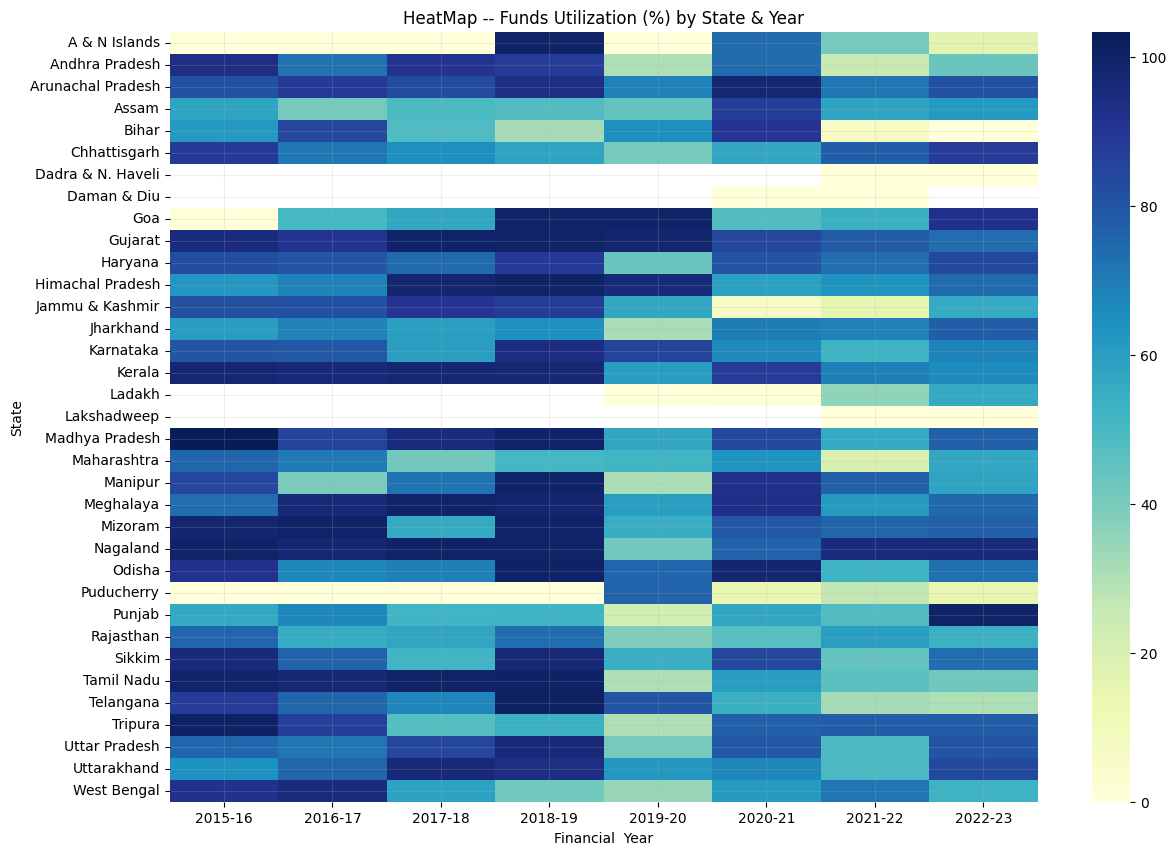

In [ ]:
# ------------------------------------------------
# 3. Heatmap – Utilization Rate by State and Year
# ------------------------------------------------
# Strip leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Now pivot_table should work
pivot_util = df.pivot_table(
    index="State",
    columns="Financial  Year",
    values="Extent of Funds Utilised against Total Funds Available (Government of India's Share)"
)

plt.figure(figsize=(14,10))
sns.heatmap(pivot_util, cmap="YlGnBu", annot=False)
plt.title("HeatMap -- Funds Utilization (%) by State & Year")
plt.show()


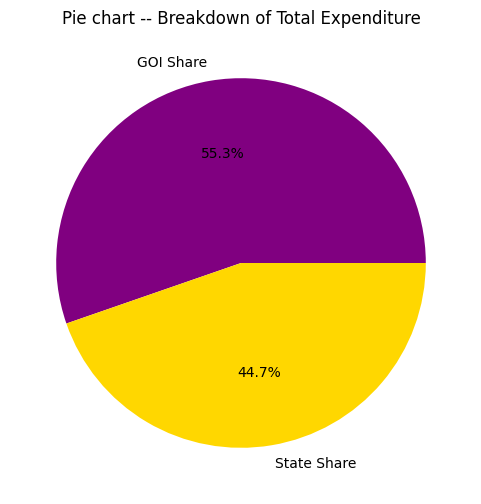

In [ ]:
# ------------------------------------------------
# 4. Pie Chart – Expenditure Share (Govt. of India vs State Govts.)
# ------------------------------------------------
total_goi_exp = df["Expenditure out of Government of India's Share"].sum()
total_state_exp = df["Expenditure out of State Governments' Share"].sum()

plt.figure(figsize=(6,6))
plt.pie([total_goi_exp, total_state_exp],
        labels=["GOI Share", "State Share"], autopct="%1.1f%%",
        colors=["Purple", "Gold"])
plt.title("Pie chart -- Breakdown of Total Expenditure")
plt.show()

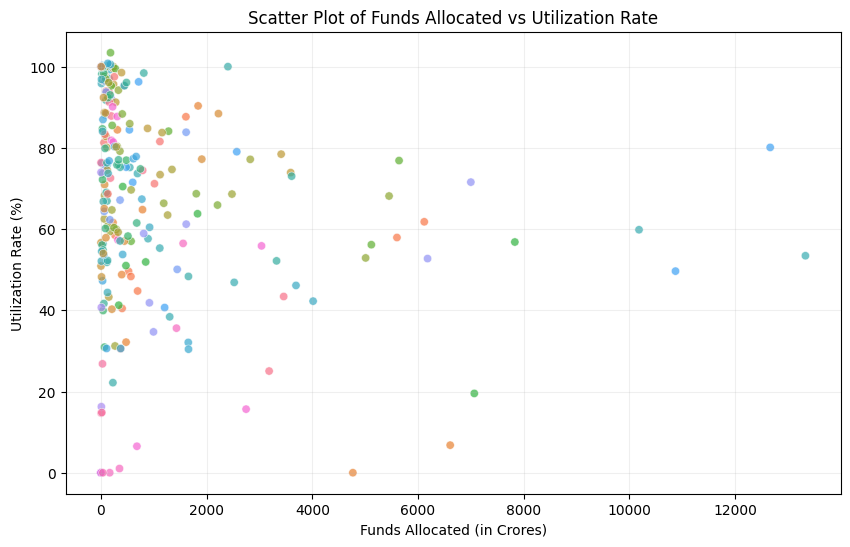

In [ ]:
# ------------------------------------------------
# 5. Scatter Plot – Funds Allocated vs Utilization Rate
# ------------------------------------------------
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,
                x="Funds Allocated by Government of India",
                y="Extent of Funds Utilised against Total Funds Available (Government of India's Share)",
                hue="State", legend=False, alpha=0.7)
plt.title("Scatter Plot of Funds Allocated vs Utilization Rate")
plt.xlabel("Funds Allocated (in Crores)")
plt.ylabel("Utilization Rate (%)")
plt.show()

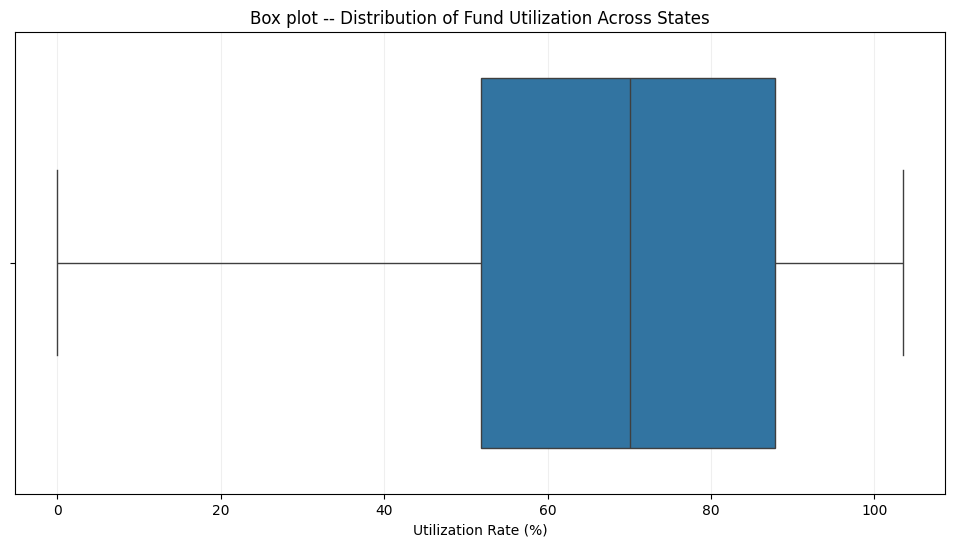

In [ ]:
# ------------------------------------------------
# 6. Box Plot – Distribution of Fund Utilization Across States
# ------------------------------------------------
plt.figure(figsize=(12,6))
sns.boxplot(data=df,
            x="Extent of Funds Utilised against Total Funds Available (Government of India's Share)")
plt.title("Box plot -- Distribution of Fund Utilization Across States")
plt.xlabel("Utilization Rate (%)")
plt.show()